In [20]:

import pandas as pd


new_data = pd.read_csv("./billets_production.csv")
display(new_data.head())
display(new_data.isnull().sum())


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
id              0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes géométriques (sans la colonne cible)
X_new = new_data[['diagonal','height_left','height_right','margin_low','margin_up','length']]

# Appliquer le même scaler utilisé lors de l'entraînement
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

In [13]:
X_new_scaled

array([[-0.66422777, -0.50222407, -1.22890038,  0.43822393,  0.48568108,
        -1.12401394],
       [-0.28760378, -0.0507867 ,  0.44945894,  1.4937023 ,  0.56401673,
        -0.28910336],
       [ 0.15749731,  1.10602155,  0.90460723,  0.14429325,  1.19070199,
        -0.93709366],
       [ 1.83518602,  1.02137704,  1.04684107, -0.59053347, -1.62938167,
         1.09410669],
       [-1.04085177, -1.57438781, -1.17200685, -1.48568601, -0.61101813,
         1.25610427]])

In [19]:
# Charger le modèle (par exemple un modèle Random Forest)
import joblib

# Charger le modèle et le seuil
model_and_threshold = joblib.load('random_forest_model.pkl')
rf_model = model_and_threshold['model']
optimal_threshold_loaded = model_and_threshold['threshold']

# Appliquer le modèle pour faire des prédictions
y_pred_new = rf_model.predict(X_new_scaled)

# Ajouter la prédiction au dataframe original pour visualiser
new_data['Prediction_is_genuine'] = y_pred_new

# Afficher les résultats
print(new_data[['diagonal','height_left','height_right','margin_low','margin_up','length', 'Prediction_is_genuine']].head())


   diagonal  height_left  height_right  margin_low  margin_up  length  \
0    171.76       104.01        103.54        5.21       3.30  111.42   
1    171.87       104.17        104.13        6.00       3.31  112.09   
2    172.00       104.58        104.29        4.99       3.39  111.57   
3    172.49       104.55        104.34        4.44       3.03  113.20   
4    171.65       103.63        103.56        3.77       3.16  113.33   

   Prediction_is_genuine  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


d:\Users\ZAPHAS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Commençons par changer le bool par du binaire pour la colonne is_genuine
new_data["Prediction_is_genuine"]=new_data["Prediction_is_genuine"].replace([1,0], [True, False])

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_18180\2585572832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data["Prediction_is_genuine"]=new_data["Prediction_is_genuine"].replace([1,0], [True, False])


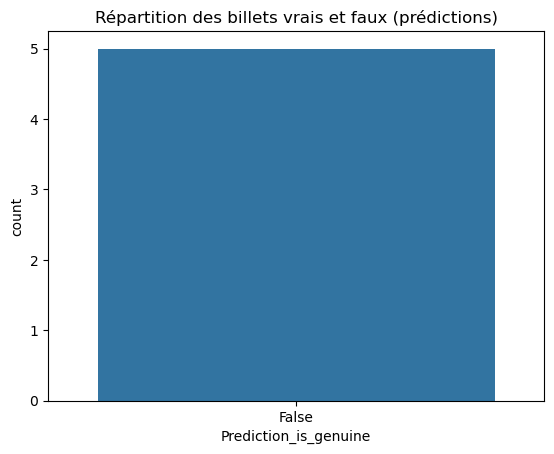

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser la répartition des prédictions
sns.countplot(x="Prediction_is_genuine", data=new_data)
plt.title("Répartition des billets vrais et faux (prédictions)")
plt.show()


In [17]:
# Sauvegarder le fichier avec les prédictions
new_data.to_csv('billets_avec_predictions.csv', index=False)

In [18]:
# Charger le nouveau fichier CSV
new_data_prediction = pd.read_csv("./billets_avec_predictions.csv")

# Vérifier les premières lignes pour s'assurer que le fichier est bien formaté
print(new_data_prediction.head())

   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   Prediction_is_genuine  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
